<a href="https://colab.research.google.com/github/caxaxa/PhD_Empirics/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Corruption and Collaborations: The Brazilian Example

In August 2013, Brazilian legislators enacted two important anti-bribery laws granting sanction reductions to collaborators. After this, in 2014 the Brazilian prosecutors initiated a series of big investigations unveiling big corruption schemes between the Brazilian government and important private corporations. In these cases, the prosecution strategy to investigate the defendants relied heavily on the offenders' disclosures under the newly enacted laws. In this context, one can argue that the investigations are evidence of the success of this anti-corruption policy. However, the impact of the policy over the widespread corruption in the country is not clear. This paper uses the empirical strategy from \cite{miller2009} to empirically test the effectiveness of the Brazilian policy against corruption. Results show that the policy was effective to both prosecute and deter corruption in Brazil.

In [1]:
!pip install  -U statsmodels
!pip install --upgrade matplotlib

# Reinitiate the kernel after updating the libraries

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 33.9 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.0
    Uninstalling matplotlib-3.8.0:
      Successfully uninstalled matplotlib-3.8.0


In [2]:
#Importing the libraries

import pandas as pd
import numpy as np




In [3]:
import matplotlib.pyplot as plt

In [4]:
# ## In case of using other crimes:

# df = pd.read_pickle('./Data/INQ_DATA.pkl')
# #creat a series of other crimes
# corruption = df.loc[(df['offences'].str.contains( 'corrup',case = False) ==True) & ((df['offences'].str.contains( 'ativa',case = False) ==True) | (df['offences'].str.contains( 'passiv',case = False) ==True)) ]
# corruption.to_pickle('./Data/Corruption.pkl')

In [5]:
# When using Colab, download the treated corruption data from my Git Repository

!mkdir Data
!mkdir Plottings
!wget https://raw.githubusercontent.com/caxaxa/PhD_Empirics/main/Data/Corruption.pkl

--2024-12-26 21:18:22--  https://raw.githubusercontent.com/caxaxa/PhD_Empirics/main/Data/Corruption.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 979226 (956K) [application/octet-stream]
Saving to: ‘Corruption.pkl’

Corruption.pkl      100%[===================>] 956.28K  --.-KB/s    in 0.01s   

2024-12-26 21:18:23 (86.5 MB/s) - ‘Corruption.pkl’ saved [979226/979226]



## Exploring the Data

In [6]:
df_corruption = pd.read_pickle('./Corruption.pkl')
df_corruption

,offences,region,title
date,,,
2009-11-03,"SCI - Corrupção passiva, 5ª CCR - Corrupção pa...",AC,11.03.2009 - INQ 0007031-39.2014.4.01.3000 (JF...
2009-12-18,"SCI - Corrupção ativa, 5ª CCR - Corrupção ativa",AC,18.12.2009 - INQ 0015790-31.2010.4.01.3000 (JF...
2010-06-29,"SCI - Corrupção ativa, 5ª CCR - Corrupção ativa",AC,"29.06.2010 - INQ 00181/2010 (DPF/AC), PR-AC"
2010-07-10,"SCI - Corrupção passiva, 5ª CCR - Corrupção pa...",AC,07.10.2010 - INQ 0002501-94.2011.4.01.3000 (JF...
2009-03-02,"SCI - Corrupção passiva, 5ª CCR - Corrupção pa...",AL,"03.02.2009 - INQ 2009.80.00.001342-8 (JF-AL, 7..."
...,...,...,...
2014-03-09,"SCI - Estelionato Majorado, 2ª CCR - Esteliona...",AL,03.09.2014 - INQ 0000077-93.2017.4.05.8000 (JF...
2014-05-27,"SCI - Estelionato Majorado, 2ª CCR - Esteliona...",MA,"27.05.2014 - INQ 00078/2014 (DPF/CAX), PRM-CAX..."
2014-03-18,"SCI - Corrupção passiva, 5ª CCR - Corrupção pa...",RN,18.03.2014 - IPL 0000544-41.2014.4.05.8400 (JF...


<ipython-input-7-0af8cb7d8cef>:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_corruption.sort_index()['2011':'2019'].resample('Y').title.count().plot()


<Axes: xlabel='date'>

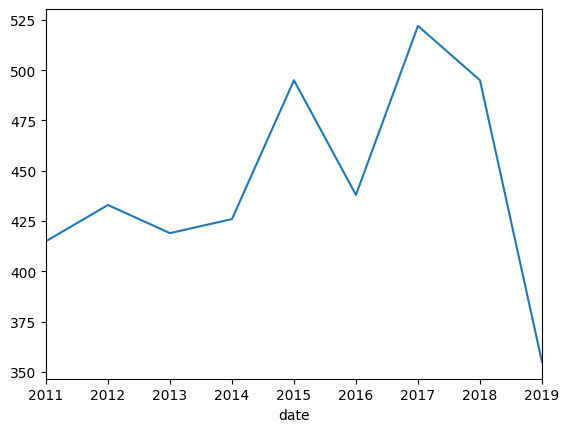

In [7]:
# Used the .sort_index() just to get rid off the deprecation warning
df_corruption.sort_index()['2011':'2019'].resample('Y').title.count().plot()

<ipython-input-8-524d466a6891>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_corruption.sort_index()['2011':'2019'].resample('M').title.count().plot()


<Axes: xlabel='date'>

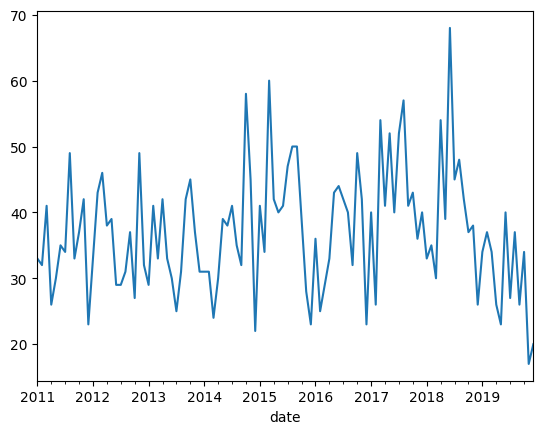

In [8]:
df_corruption.sort_index()['2011':'2019'].resample('M').title.count().plot()

<Axes: xlabel='date'>

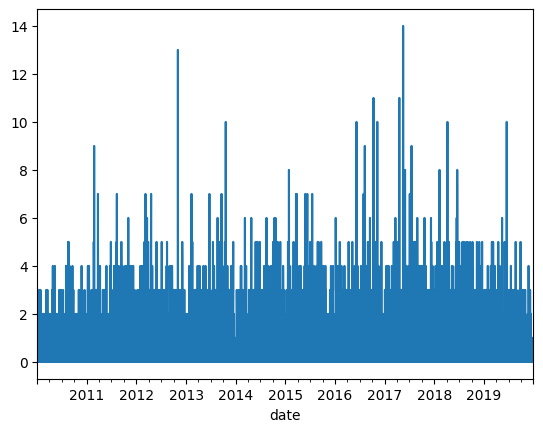

In [9]:
df_corruption.sort_index()['2010':'2019'].resample('D').title.count().plot()

In [10]:
states = pd.unique(df_corruption['region'])

In [11]:
# Ensure the DataFrame's index is a DatetimeIndex and sorted
df_corruption.index = pd.to_datetime(df_corruption.index)
df_corruption = df_corruption.sort_index()

In [ ]:
fig = plt.figure(figsize=(17,30))

fig.subplots_adjust(hspace = 0.5) # avoid x axis supperposition

for i in range(0,len(states),1):
    plt.subplot(int(len(states)/3),3,i+1)
    plt.plot((df_corruption['2011':'2019'].loc[df_corruption['2011':'2019']['region'].str.contains(states[i]) ==True].resample('YE').count()),color = 'cornflowerblue', lw = 1)
    #plt.axvline(2013, color='red', lw=1, alpha=1)
    plt.legend(('Corruption','Anti-Corruption Shock'),loc=2)
    #plt.xlabel('Years')
    plt.ylabel('Quantity')
    plt.title('Yearly Corruption Detections in ' + states[i])
plt.show()
#fig.savefig('./Plottings/states.pdf', transparent= True)

# Empirical Strategy

1 - Based on Miller (2009), I'll try to fit a polinomial curve after the relevant schok; and

2 - Run a best fit regresion (lowess) in the entire set and check if there are points of spike and long term decrease

## 1 - Corruption Deterrence Empirical Model


Following Berlin, Qin and Spagnolo (2018) , a possible OLS regression (Poisson Regression) using feasible data from the Brazilian Federal Police of initiated investigations of corruption as dependent variable $Y$ can be expressed by:

$$Y_{t}=\beta_{0}+\beta_1 D_t+ \beta _2 T1^{n}_{t}+ \beta _3 T2^{n}_{t} + \beta_4 X_{t} + \varepsilon_{t}$$

For,

$t$= Month after January 2009; and

$n$= Order of the intended tested polynomial.


Where

$Y_{t}$= Number of initiated investigations for corruption crimes (Or corruption Related Crimes);

$D_t$= Dummy for the impact of the enforcements, being 0 before August 2013 and 1 after;

$T1$= Time effect of all sample. Being 1 at the first observation 2 at the next and so on;

$T2$= Time effect from the beginning of the enforcement shock. Being 1 after august 2013, 2 in the next month and so on; and

$\varepsilon_{it}$= Is the error from functional predictions, it is expected to be normally distributed and i.i.d.


In order to test different shaped polynomials that might fit the expected detection curve,  the variables $T1$ and $T2$ can be tested on different order polynomials to check different goodness of fit.

In [ ]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.iolib.summary2 import summary_col

!pip install Stargazer
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

### Yearly Regressions

In [ ]:
#Yearly Variables
#Creating the yearly dataframe
ydf = df_corruption['2011':'2019'].resample('Y').count()

ydf['cons'] = 1


# creat a dummy with 0 before 2013 and 1 after #
dummy = []
for i in (range(2010,2019)):
    if i < 2014:
        dummy.append(0)
    else:
        dummy.append(1)

ydf['dummy'] = dummy
ydf['year'] = range(2011,2020,1)
# creat a list of 1 to 10#
yt1 = list(range(1,10))

ydf['t1'] = yt1


# creat a polynomial root after 2013#
yt2= []                  # creat a polynom root after 2013#
for i in (range(2010,2019)):
    if i < 2015:
        yt2.append(0)
    else:
        yt2.append(i-2015)
ydf['t2'] = yt2

# Creating the higher order polynoms

ydf['s1'] = np.power(yt1,2)
ydf['c1'] = np.power(yt1,3)
ydf['s2'] = np.power(yt2,2)
ydf['c2'] = np.power(yt2,3)
ydf['q2'] = np.power(yt2,3)
ydf['f2'] = np.power(yt2,3)


In [ ]:
ydf.head(20)

In [ ]:
#CORRUPTION ONLY
results1 = sm.OLS(ydf['offences'], ydf[['cons','dummy']]).fit()
results2 = sm.OLS(ydf['offences'], ydf[['cons','dummy','t1','t2','s2','c2','q2','f2']]).fit()
results3 = sm.OLS(ydf['offences'], ydf[['cons','dummy','t1','t2','s1','s2']]).fit()
results4 = sm.OLS(ydf['offences'], ydf[['cons','dummy','t1','t2','s2','c2']]).fit()
stargazer = Stargazer([results1, results2,results3,results4])
stargazer.covariate_order(['cons','dummy'])
HTML(stargazer.render_html())

In [ ]:

fig = plt.figure(figsize=(20,10))

result_list = [results1,results2,results3,results4]
theta = 4

for i in range(len(result_list)):
  plt.subplot(2,2,i+1)
  iv_l1 = result_list[i].get_prediction().summary_frame()["obs_ci_lower"]
  iv_u1 = result_list[i].get_prediction().summary_frame()["obs_ci_upper"]
  plt.plot( ydf['t1'], ydf['offences'], '.',lw=1)
  plt.plot(ydf['t1'],result_list[i].fittedvalues, 'k-', lw=0.5)
  plt.plot(ydf['t1'], iv_u1, color='red', lw=0.2)
  plt.plot( ydf['t1'],iv_l1, color='red', lw=0.2)
  plt.axvline(theta, color='black', lw=1, alpha=0.5)
  plt.fill_between( ydf['t1'],iv_u1,iv_l1, color='red', alpha=0.06)
  plt.legend(('data','OLS','95% Significance'),loc=2)

plt.show()

#fig.savefig('emp3.pdf')

### Monthly Regressions

In [ ]:
#Monthly

mdf = df_corruption['2011':'2019'].resample('M').count()

#create a constant

mdf['cons'] = 1


# creat a dummy with 0 before feb 2014 (x months) and 1 after # Change this to better fit### Lava Jato 17/marco
intervention = 42

dummy = []
for i in (range(0,len(mdf))):
    if i <intervention:
        dummy.append(0)
    else:
        dummy.append(1)

mdf['dummy'] = dummy

# creat a list of 1 to 13#
t1 = list(range(0,len(mdf)))

mdf['t1'] = t1

# creat a polynom root after 2013#
t2= []
for i in (range(0,len(mdf))):
    if i < intervention:
        t2.append(0)
    else:
        t2.append(i-intervention)

mdf['t2'] = t2

#Creating other orther polynomials

mdf['s1'] = np.power(t1,2)
mdf['c1'] = np.power(t1,3)
mdf['s2'] = np.power(t2,2)
mdf['c2'] = np.power(t2,3)
mdf['q1'] = np.power(t1,4)
mdf['f1'] = np.power(t1,5)
mdf['q2'] = np.power(t2,4)
mdf['f2'] = np.power(t2,5)

mdf = mdf.fillna(0)


In [ ]:
mdf.head(5)

In [ ]:
#  Corruption
results1 = sm.OLS(mdf['offences'], mdf[['cons','dummy']]).fit()
results2 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t2']]).fit()
results3 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t1','t2']]).fit()
results4 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t2','s2']]).fit()
results5 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t2','s2','c2','q2']]).fit()
results6 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t2','s2','c2','q2','f2']]).fit()
stargazer = Stargazer([results1, results2,results3,results4,results5,results6])
stargazer.covariate_order(['cons','dummy','t2','s2','c2','q2','f2'])
HTML(stargazer.render_html())

In [ ]:

fig = plt.figure(figsize=(16,9))

result_list = [results1,results2,results3,results4,results5,results6]
theta = intervention

for i in range(len(result_list)):
  plt.subplot(3,2,i+1)
  iv_l1 = result_list[i].get_prediction().summary_frame()["obs_ci_lower"]
  iv_u1 = result_list[i].get_prediction().summary_frame()["obs_ci_upper"]
  plt.plot( mdf['t1'], mdf['offences'], '.',lw=1)
  plt.plot(mdf['t1'],result_list[i].fittedvalues, 'k-', lw=0.5)
  plt.plot(mdf['t1'], iv_u1, color='red', lw=0.2)
  plt.plot( mdf['t1'],iv_l1, color='red', lw=0.2)
  plt.axvline(theta, color='black', lw=1, alpha=0.5)
  plt.fill_between( mdf['t1'],iv_u1,iv_l1, color='red', alpha=0.06)
  plt.legend(('data','OLS','95% Significance'),loc=2)

plt.show()

In [ ]:
#  Corruption
#
results1 = sm.Poisson(mdf['offences'], mdf[['cons','dummy']]).fit()
results2 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t1']]).fit()
results3 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t2']]).fit()
results4 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t1','t2']]).fit()
results5 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t2','s2']]).fit()
results6 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t1','s1','t2','s2']]).fit()
stargazer = Stargazer([results1, results2,results3,results4,results5,results6])
stargazer.covariate_order(['cons','dummy','t1','t2','s1','s2'])
HTML(stargazer.render_html())

In [ ]:
results5.params

In [ ]:

fig = plt.figure(figsize=(16,9))

result_list = [results1,results2,results3,results4,results5,results6]
theta = intervention

for i in range(len(result_list)):
  plt.subplot(3,2,i+1)
  iv_l1 = np.exp(result_list[i].fittedvalues.values - 1.96*((result_list[i].fittedvalues.values/len(result_list[i].fittedvalues.values))**(1/2)))
  iv_u1 = np.exp(result_list[i].fittedvalues.values + 1.96*((result_list[i].fittedvalues.values/len(result_list[i].fittedvalues.values))**(1/2)))
  plt.plot( mdf['t1'], mdf['offences'], '.',lw=1)
  plt.plot(mdf['t1'],np.exp(result_list[i].fittedvalues), 'k-', lw=0.5)
  plt.plot(mdf['t1'], iv_u1, color='red', lw=0.2)
  plt.plot( mdf['t1'],iv_l1, color='red', lw=0.2)
  plt.axvline(theta, color='black', lw=1, alpha=0.5)
  plt.fill_between( mdf['t1'],iv_u1,iv_l1, color='red', alpha=0.06)
  plt.title('Equation ({})'.format(str(i+1)))
  plt.xticks(np.arange(0, len(mdf) +1 , step=len(mdf)/9), np.arange(2010,2020,1))  # Set label locations.
  plt.tight_layout()
  plt.legend(('data','Poisson Regression','95% Significance'),loc=2)
  #fig.savefig('emp3.pdf')

plt.show()

# Multivariable Regressions

Adding, GDP growth, Unemployment rate and onther variables.

Adding state fixed effects.

In [ ]:
#Download the data from my Github Repo
!wget https://raw.githubusercontent.com/caxaxa/PhD_Empirics/main/Data/GDP.csv
!wget https://raw.githubusercontent.com/caxaxa/PhD_Empirics/main/Data/unemployment2.csv
!wget https://raw.githubusercontent.com/caxaxa/PhD_Empirics/main/Data/interest_rate.csv
!wget https://raw.githubusercontent.com/caxaxa/PhD_Empirics/main/Data/IPCA.csv

In [ ]:
# CSV dowloaded from 'ipeadata.gov.br' *Fonte: IPEA * Last trim expected
tgdp = pd.read_csv('./GDP.csv')

tgdp = tgdp.rename(columns={ 'PIB - preços de mercado - var. real trim. - (%) - Instituto Brasileiro de Geografia e Estatística- Sistema de Contas Nacionais Trimestrais (IBGE/SCN Trimestral) - SCN104_PIBPMG104': 'gdp'})
tgdp = pd.DataFrame(tgdp)
#dropting uncessary columns
tgdp = tgdp.drop(['Data'], axis=1)

tgdp = tgdp/100
#creating the date column in datetime format:
tgdp['date'] = pd.date_range('1996-01-01','2020-01-01', freq='Q')

#setting a date index:
tgdp = tgdp.set_index('date')


#Arranging the data to fit Multivariate Monthly regression:
# taking average of quarterly growth to monthly observations: (other possible method is .pad() insted of .bfill())
mdf['gdp'] = tgdp['2008-12-01':'2019'].resample('M', closed = 'left').bfill()

#mdf['l_gdp'] = mdf['l_gdp'].fillna(method = 'bfill')

#Create a Lagged gdp vaariable for robustness check

mdf['l_gdp'] = tgdp['2007-12-01':'2018'].resample('M', closed = 'left').bfill()


mdf['l_gdp'] = mdf['l_gdp'].fillna(method = 'ffill')






In [ ]:
# CSV dowloaded from 'ipeadata.gov.br' IBGE PNAD -CORREC FOR BEFORE 2012 from SEAD
unemployment = pd.read_csv('./unemployment2.csv')

unemployment = unemployment.rename(columns={ 'Taxa de desocupação - (%) - Instituto Brasileiro de Geografia e Estatística- Pesquisa Nacional por Amostra de Domicílios Contínua (IBGE/PNAD Contínua) - PNADC12_TDESOC12': 'unemployment'})
unemployment = pd.DataFrame(unemployment)
#dropting uncessary columns
unemployment = unemployment.drop(['Unnamed: 2','Data'],axis = 1)

unemplyment = unemployment/100
#creating the date column in datetime format:
unemployment['date'] = pd.date_range('2009','2020', freq='M')

#setting a date index:
unemployment = unemployment.set_index('date')

mdf['unemployment'] = unemployment['2009':'2020'].resample('M').sum()

mdf['l_unemployment'] = unemployment['2008':'2019'].resample('M').sum()





In [ ]:
# CSV dowloaded from 'ipeadata.gov.br'
interest = pd.read_csv('./interest_rate.csv')

interest = interest.rename(columns={ 'Taxa de juros - Over / Selic - (% a.m.) - Banco Central do Brasil- Boletim- Seção mercado financeiro e de capitais (Bacen/Boletim/M. Finan.) - BM12_TJOVER12': 'interest'})
interest = pd.DataFrame(interest)
#dropting uncessary columns
interest = interest.drop(['Unnamed: 2','Data'],axis = 1)
interes = interest/100

#creating the date column in datetime format:
interest['date'] = pd.date_range('1973-12-01','2020-02-01', freq='M')

#setting a date index:
interest = interest.set_index('date')

mdf['interest'] = interest['2009':'2020'].resample('M').sum()

mdf['l_interest'] = interest['2008':'2019'].resample('M').sum()

In [ ]:
# CSV dowloaded from 'ipeadata.gov.br'
inflation = pd.read_csv('./IPCA.csv')

inflation = inflation.rename(columns={ 'Inflação - IPCA - (% a.m.) - Instituto Brasileiro de Geografia e Estatística- Sistema Nacional de Índices de Preços ao Consumidor (IBGE/SNIPC) - PRECOS12_IPCAG12': 'interest'})
inflation = pd.DataFrame(inflation)
#dropting uncessary columns
inflation = inflation.drop(['Unnamed: 2','Data'],axis = 1)
inflation = inflation/100

#creating the date column in datetime format:y
inflation['date'] = pd.date_range('1979-12-01','2020-01-01', freq='M')

#setting a date index:
inflation = inflation.set_index('date')

mdf['inflation'] = inflation['2008-12-01':'2019'].resample('M').sum()

mdf['l_inflation'] = inflation['2007-12-01':'2018'].resample('M').sum()


In [ ]:
# Creating Real Interest Variable

mdf['real_interest'] = mdf['inflation']*(mdf['interest']+1)


mdf['l_real_interest'] = mdf['l_inflation']*(mdf['l_interest']+1)


In [ ]:
mdf = mdf.fillna(0)

In [ ]:
#regressing


results1 = sm.OLS(mdf['offences'], mdf[['cons','dummy','gdp','unemployment','real_interest']]).fit()
results2 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t1','t2','gdp','unemployment','real_interest']]).fit()
results3 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t1','s1','c1','t2','s2','c2','gdp','unemployment','real_interest']]).fit()
results4 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t2','s2','c2','gdp','unemployment','real_interest']]).fit()
results5 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t1','t2','s2','q2','gdp','unemployment','real_interest']]).fit()
results6 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t1','t2','s2','f2','gdp','unemployment','real_interest']]).fit()
model_list = [results1, results2,results3,results4,results5,results6]
stargazer = Stargazer(model_list)
stargazer.covariate_order(['cons','dummy','gdp','unemployment','real_interest'])
HTML(stargazer.render_html())

In [ ]:
# print(stargazer.render_latex())

In [ ]:

fig = plt.figure(figsize=(16,9))

result_list = [results1,results2,results3,results4,results5,results6]
theta = intervention

for i in range(len(result_list)):
  plt.subplot(3,2,i+1)
  iv_l1 = result_list[i].get_prediction().summary_frame()["obs_ci_lower"]
  iv_u1 = result_list[i].get_prediction().summary_frame()["obs_ci_upper"]
  plt.plot( mdf['t1'], mdf['offences'], '.',lw=1)
  plt.plot(mdf['t1'],result_list[i].fittedvalues, 'k-', lw=0.5)
  plt.plot(mdf['t1'], iv_u1, color='red', lw=0.2)
  plt.plot( mdf['t1'],iv_l1, color='red', lw=0.2)
  plt.axvline(theta, color='black', lw=1, alpha=0.5)
  plt.fill_between( mdf['t1'],iv_u1,iv_l1, color='red', alpha=0.06)
  plt.xticks(np.arange(0, len(mdf) +1 , step=len(mdf)/9), np.arange(2010,2020,1))  # Set label locations.
  plt.legend(('data','OLS','95% Significance'),loc=2)

plt.show()

#fig.savefig('emp3.pdf')

In [ ]:

from scipy import stats

results_list = []

# Assuming you have a list of OLS models in model_list
for model in model_list:

    # Get fitted values
    fitted_values = model.fittedvalues

    # Extract fitted values
    last_fitted_value = fitted_values.iloc[-1]
    pre_policy_fitted_value = fitted_values.iloc[intervention - 1]

    # Difference between pre-policy and last fitted values (not a Z-test)
    difference = last_fitted_value - pre_policy_fitted_value

    # Goodness-of-fit measures
    aic = model.aic
    bic = model.bic
    log_likelihood = model.llf

    # Store the results along with the fitted values and goodness-of-fit measures
    results_list.append((pre_policy_fitted_value, last_fitted_value, difference, aic, bic, log_likelihood))

# Display the results
for i, (pre_policy_value, last_value, difference, aic, bic, log_likelihood) in enumerate(results_list, start=1):
    print(f'Model {i}: Pre-policy fitted value = {pre_policy_value}, Last fitted value = {last_value}, Difference = {difference}, AIC = {aic}, BIC = {bic}, Log-Likelihood = {log_likelihood}')


In [ ]:

# Assuming 'model_list' and 'intervention' are defined
results_list = []

for model in model_list:
    # Get fitted values
    fitted_values = model.fittedvalues

    # Get standard errors of the fitted values
    predictions = model.get_prediction()
    predict_std_err = predictions.se_mean

    # Extract fitted values and their standard errors
    last_fitted_value = fitted_values.iloc[-1]
    pre_policy_fitted_value = fitted_values.iloc[intervention - 1]
    last_se = predict_std_err[-1]
    pre_policy_se = predict_std_err[intervention - 1]

    # Calculate the standard error of the difference
    diff_se = np.sqrt(last_se**2 + pre_policy_se**2)

    # Calculate the observed difference
    observed_diff = last_fitted_value - pre_policy_fitted_value

    # t-test for the difference
    t_stat = observed_diff / diff_se
    df = len(fitted_values) - len(model.params)  # degrees of freedom
    p_value = 2 * stats.t.sf(np.abs(t_stat), df)

    # Goodness-of-fit measures
    aic = model.aic
    bic = model.bic
    log_likelihood = model.llf

    # Store results
    results_list.append([pre_policy_fitted_value, last_fitted_value, observed_diff, p_value, aic, bic, log_likelihood])

# Create DataFrame
results_df = pd.DataFrame(results_list, columns=['Pre-policy Value', 'Last Value', 'Difference', 'P-value', 'AIC', 'BIC', 'Log-Likelihood'])

# Add Model numbers
results_df.index = [f'Model {i+1}' for i in range(len(results_df))]

# Display the DataFrame
print(results_df)


In [ ]:
#
results1 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','gdp','unemployment','real_interest']]).fit()
results2 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t1','gdp','unemployment','real_interest']]).fit()
results3 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t2','gdp','unemployment','real_interest']]).fit()
results4 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t1','t2','gdp','unemployment','real_interest']]).fit()
results5 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t2','s2','gdp','unemployment','real_interest']]).fit()
results6 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t1','s1','t2','s2','gdp','unemployment','real_interest']]).fit()
model_list = [results1, results2,results3,results4,results5,results6]
stargazer = Stargazer(model_list)
stargazer.covariate_order(['cons','dummy','unemployment','real_interest','gdp'])
HTML(stargazer.render_html())

In [ ]:
#print(stargazer.render_latex())

In [ ]:

fig = plt.figure(figsize=(16,9))

result_list = [results1,results2,results3,results4,results5,results6]
theta = intervention

for i in range(len(result_list)):
  plt.subplot(3,2,i+1)
  iv_l1 = np.exp(result_list[i].fittedvalues.values - 1.96*((result_list[i].fittedvalues.values/len(result_list[i].fittedvalues.values))**(1/2)))
  iv_u1 = np.exp(result_list[i].fittedvalues.values + 1.96*((result_list[i].fittedvalues.values/len(result_list[i].fittedvalues.values))**(1/2)))
  plt.plot( mdf['t1'], mdf['offences'], '.',lw=1)
  plt.plot(mdf['t1'],np.exp(result_list[i].fittedvalues), 'k-', lw=0.5)
  plt.plot(mdf['t1'], iv_u1, color='red', lw=0.2)
  plt.plot( mdf['t1'],iv_l1, color='red', lw=0.2)
  plt.axvline(theta, color='black', lw=1, alpha=0.5)
  plt.fill_between( mdf['t1'],iv_u1,iv_l1, color='red', alpha=0.06)
  plt.xticks(np.arange(0, len(mdf) +1 , step=len(mdf)/9), np.arange(2010,2020,1))  # Set label locations.
  plt.savefig('reg_2.pdf')
  plt.legend(('data','Predicted Mean','95% Significance Interval'),loc='best')

plt.show()

In [ ]:
from scipy import stats

In [ ]:
# Get fitted values from each model
fitted_values1 = results1.fittedvalues
# ... repeat for other models ...

# Define the index of the policy intervention
policy_intervention_index = intervention

# Extract fitted values
last_fitted_value = fitted_values1.iloc[-1]  # replace 'fitted_values1' with the appropriate model's fitted values
pre_policy_fitted_value = fitted_values1.iloc[policy_intervention_index - 1]  # -1 because we want the value just before the intervention

# Statistical comparison
# Here we'll perform a z-test for comparing two Poisson rates
rate1 = pre_policy_fitted_value
rate2 = last_fitted_value
n1 = n2 = 1  # single observation for each rate

# Z-test formula for two Poisson rates
z = (rate1 - rate2) / ((rate1/n1 + rate2/n2)**0.5)
p_value = stats.norm.sf(abs(z)) * 2  # two-tailed p-value

print(f'Pre-policy fitted value: {rate1}, Last fitted value: {rate2}')
print(f'Z-statistic: {z}, P-value: {p_value}')

In [ ]:
import statsmodels.api as sm
import pandas as pd
from scipy import stats


results_list = []
# Loop through each model formula
for model in model_list:

    # Get fitted values
    fitted_values = model.fittedvalues

    # Extract fitted values
    last_fitted_value = fitted_values.iloc[-1]
    pre_policy_fitted_value = fitted_values.iloc[policy_intervention_index ]

    # Statistical comparison
    rate1 = pre_policy_fitted_value
    rate2 = last_fitted_value
    n1 = n2 = 1  # single observation for each rate

    # Z-test formula for two Poisson rates
    z = (rate1 - rate2) / ((rate1/n1 + rate2/n2)**0.5)
    p_value = stats.norm.sf(abs(z)) * 2  # two-tailed p-value

    # Goodness-of-fit measures
    aic = model.aic
    bic = model.bic
    log_likelihood = model.llf

    # Store the results along with the fitted values and goodness-of-fit measures
    results_list.append((rate1, rate2, z, p_value, aic, bic, log_likelihood))

# Display the results
for i, (rate1, rate2, z, p, aic, bic, log_likelihood) in enumerate(results_list, start=1):
    print(f'Model {i}: Pre-policy fitted value = {rate1}, Last fitted value = {rate2}, Z-statistic = {z}, P-value = {p}, AIC = {aic}, BIC = {bic}, Log-Likelihood = {log_likelihood}')


In [ ]:
import numpy as np
import statsmodels.api as sm

# Assuming 'mdf' is your DataFrame and is already loaded

for model in model_list:

    # Get fitted values
    fitted_values = model.fittedvalues

    # Define the index of the policy intervention
    policy_intervention_index = intervention

    # Extract the pre-policy and last fitted values
    pre_policy_value = fitted_values.iloc[policy_intervention_index - 1]
    last_value = fitted_values.iloc[-1]

    # Bootstrapping
    n_bootstraps = 100000  # Number of bootstrap samples
    bootstrap_differences = []

    for _ in range(n_bootstraps):
        # Bootstrap sample
        sample = fitted_values.sample(frac=1, replace=True)

        # Compute the difference
        pre_policy_sample_value = sample.iloc[policy_intervention_index - 1]
        last_sample_value = sample.iloc[-1]
        difference = last_sample_value - pre_policy_sample_value

        bootstrap_differences.append(difference)

    # Compute the proportion of differences that are 0 or more (one-tailed test)
    p_value = np.mean(np.array(bootstrap_differences) >= 0)

    print(f'Mean bootstrapped difference: {np.mean(bootstrap_differences)}')
    print(f'P-value: {p_value}')


In [ ]:
#  Corruption
results1 = sm.NegativeBinomial(mdf['offences'], mdf[['cons','dummy','gdp','unemployment','real_interest']]).fit()
results2 = sm.NegativeBinomial(mdf['offences'], mdf[['cons','dummy','t2','gdp','unemployment','real_interest']]).fit()
results3 = sm.NegativeBinomial(mdf['offences'], mdf[['cons','dummy','t1','t2','gdp','unemployment','real_interest']]).fit()
results4 = sm.NegativeBinomial(mdf['offences'], mdf[['cons','dummy','t2','s2','gdp','unemployment','real_interest']]).fit()
results5 = sm.NegativeBinomial(mdf['offences'], mdf[['cons','dummy','t1','t2','s2','gdp','unemployment','real_interest']]).fit()
stargazer = Stargazer([results1, results2,results3,results4,results5])
stargazer.covariate_order(['cons','dummy','t2','s2','unemployment','real_interest','gdp'])
HTML(stargazer.render_html())

In [ ]:

fig = plt.figure(figsize=(16,9))

result_list = [results1,results2,results3,results4,results5]
theta = intervention

for i in range(len(result_list)):
  plt.subplot(3,2,i+1)
  iv_l1 = np.exp(result_list[i].fittedvalues.values - 1.96*((result_list[i].fittedvalues.values/len(result_list[i].fittedvalues.values))**(1/2)))
  iv_u1 = np.exp(result_list[i].fittedvalues.values + 1.96*((result_list[i].fittedvalues.values/len(result_list[i].fittedvalues.values))**(1/2)))
  plt.plot( mdf['t1'], mdf['offences'], '.',lw=1)
  plt.plot(mdf['t1'],np.exp(result_list[i].fittedvalues), 'k-', lw=0.5)
  plt.plot(mdf['t1'], iv_u1, color='red', lw=0.2)
  plt.plot( mdf['t1'],iv_l1, color='red', lw=0.2)
  plt.axvline(theta, color='black', lw=1, alpha=0.5)
  plt.fill_between( mdf['t1'],iv_u1,iv_l1, color='red', alpha=0.06)
  #plt.legend(('data','OLS','95% Significance'),loc=2)

plt.show()

### Robustness --> Regressing with Lagged Variables

In [ ]:
#
results1 = sm.OLS(mdf['offences'], mdf[['cons','dummy','l_gdp','l_unemployment','l_real_interest']]).fit()
results2 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t1','t2','l_gdp','l_unemployment','l_real_interest']]).fit()
results3 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t1','s1','c1','t2','s2','c2','l_gdp','l_unemployment','l_real_interest']]).fit()
results4 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t2','s2','c2','l_gdp','l_unemployment','l_real_interest']]).fit()
results5 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t1','t2','s2','q2','l_gdp','l_unemployment','l_real_interest']]).fit()
results6 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t1','t2','s2','f2','l_gdp','l_unemployment','l_real_interest']]).fit()
model_list = [results1, results2,results3,results4,results5,results6]
stargazer = Stargazer(model_list)
stargazer.covariate_order(['cons','dummy','l_unemployment','l_real_interest','l_gdp'])
HTML(stargazer.render_html())

In [ ]:

# Assuming 'model_list' and 'intervention' are defined
results_list = []

for model in model_list:
    # Get fitted values
    fitted_values = model.fittedvalues

    # Get standard errors of the fitted values
    predictions = model.get_prediction()
    predict_std_err = predictions.se_mean

    # Extract fitted values and their standard errors
    last_fitted_value = fitted_values.iloc[-1]
    pre_policy_fitted_value = fitted_values.iloc[intervention - 1]
    last_se = predict_std_err[-1]
    pre_policy_se = predict_std_err[intervention - 1]

    # Calculate the standard error of the difference
    diff_se = np.sqrt(last_se**2 + pre_policy_se**2)

    # Calculate the observed difference
    observed_diff = last_fitted_value - pre_policy_fitted_value

    # t-test for the difference
    t_stat = observed_diff / diff_se
    df = len(fitted_values) - len(model.params)  # degrees of freedom
    p_value = 2 * stats.t.sf(np.abs(t_stat), df)

    # Goodness-of-fit measures
    aic = model.aic
    bic = model.bic
    log_likelihood = model.llf

    # Store results
    results_list.append([pre_policy_fitted_value, last_fitted_value, observed_diff, p_value, aic, bic, log_likelihood])

# Create DataFrame
results_df = pd.DataFrame(results_list, columns=['Pre-policy Value', 'Last Value', 'Difference', 'P-value', 'AIC', 'BIC', 'Log-Likelihood'])

# Add Model numbers
results_df.index = [f'Model {i+1}' for i in range(len(results_df))]

# Display the DataFrame
print(results_df)


In [ ]:
#
results1 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','l_gdp','l_unemployment','l_real_interest']]).fit()
results2 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t1','l_gdp','l_unemployment','l_real_interest']]).fit()
results3 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t2','l_gdp','l_unemployment','l_real_interest']]).fit()
results4 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t1','t2','l_gdp','l_unemployment','l_real_interest']]).fit()
results5 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t2','s2','l_gdp','l_unemployment','l_real_interest']]).fit()
results6 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t1','s1','t2','s2','l_gdp','l_unemployment','l_real_interest']]).fit()
stargazer = Stargazer(model_list)
stargazer.covariate_order(['cons','dummy','l_unemployment','l_real_interest','l_gdp'])
HTML(stargazer.render_html())

## LOWESS - Localy weighted scatterplot smoothing

We fit a curve to the univariate corruption detection data.

In [ ]:
import pylab
import seaborn as sns


pylab.rc("figure", figsize=(16, 8))
pylab.rc("font", size=14)



In [ ]:
smoothed = sm.nonparametric.lowess(exog=mdf['t1'], endog= mdf['offences'], frac=0.2)

In [ ]:
# Plot the fit line
fig, ax = pylab.subplots()

ax.scatter(mdf['t1'], mdf['offences'])
ax.plot(smoothed[:, 0], smoothed[:, 1], c="k")
pylab.autoscale(enable=True, axis="x", tight=True)

In [ ]:
# Now create a bootstrap confidence interval around the a LOWESS fit


def lowess_with_confidence_bounds(
    x, y, eval_x, N=200, conf_interval=0.95, lowess_kw=None
):
    """
    Perform Lowess regression and determine a confidence interval by bootstrap resampling
    """
    # Lowess smoothing
    smoothed = sm.nonparametric.lowess(exog=x, endog=y, xvals=eval_x, **lowess_kw)

    # Perform bootstrap resamplings of the data
    # and  evaluate the smoothing at a fixed set of points
    smoothed_values = np.empty((N, len(eval_x)))
    for i in range(N):
        sample = np.random.choice(len(x), len(x), replace=True)
        sampled_x = x[sample]
        sampled_y = y[sample]

        smoothed_values[i] = sm.nonparametric.lowess(
            exog=sampled_x, endog=sampled_y, xvals=eval_x, **lowess_kw
        )

    # Get the confidence interval
    sorted_values = np.sort(smoothed_values, axis=0)
    bound = int(N * (1 - conf_interval) / 2)
    bottom = sorted_values[bound - 1]
    top = sorted_values[-bound]

    return smoothed, bottom, top




In [ ]:
# Compute the 95% confidence interval
eval_x = np.linspace(0, 107, 31)
smoothed, bottom, top = lowess_with_confidence_bounds(
    mdf['t1'], mdf['offences'], eval_x, lowess_kw={"frac": 0.25}
)

In [ ]:
# Plot the confidence interval and fit
fig, ax = pylab.subplots()
ax.scatter(mdf['t1'], mdf['offences'])
ax.plot(eval_x, smoothed, c="k")
ax.fill_between(eval_x, bottom, top, alpha=0.06, color="r")
ax.axvline(theta, color='red', lw=1, alpha=0.5)
plt.xticks(np.arange(0, len(mdf) +1 , step=len(mdf)/9), np.arange(2010,2020,1))  # Set label locations.
plt.legend(('Lowess Predicted Mean','Policy Intervention','Data Points','95% Sigificance Interval'),loc=2)
pylab.autoscale(enable=True, axis="x", tight=True)
#plt.savefig('lowess.pdf')

In [ ]:
# predictions
smoothed

In [ ]:
# Calculating the percntage variation from the end of the data in relation to the pre-policy period

mpv = np.array([33.74161096, 34.46699979, 35.0222235 , 35.4667589 , 35.61198674,
       35.29081795, 34.64522045, 34.24685881, 34.25711556, 33.98970698,
       34.41339042, 35.4678435]).mean()

(mpv - 23.57)/mpv

In [ ]:
# The botton value of the imediete pre-policy shock
bottom[11]

In [ ]:
# Upper bound of the last period
top[-1]

## Daily Data and Regressions

In [ ]:
## Daily data

ddf = df_corruption['2011':'2019'].resample('D').count()

#create a constant

ddf['cons'] = 1


# creat a dummy with 0 before feb 2014 (x days) and 1 after # Change this to better fit###
d_intervention = 504

dummy = []
for i in (range(0,len(ddf))):
    if i <intervention:
        dummy.append(0)
    else:
        dummy.append(1)

ddf['dummy'] = dummy

# creat a list of 1 to 13#
t1 = list(range(0,len(ddf)))

ddf['t1'] = t1

# creat a polynom root after 2013#
t2= []
for i in (range(0,len(ddf))):
    if i < intervention:
        t2.append(0)
    else:
        t2.append(i-intervention)

ddf['t2'] = t2

#Creating other orther polynomials

ddf['s1'] = np.power(t1,2)
ddf['c1'] = np.power(t1,3)
ddf['s2'] = np.power(t2,2)
ddf['c2'] = np.power(t2,3)
ddf['q1'] = np.power(t1,4)
ddf['f1'] = np.power(t1,5)
ddf['q2'] = np.power(t2,4)
ddf['f2'] = np.power(t2,5)



In [ ]:
# Creating the Daily data for the other exogenous variables



ddf['gdp'] = tgdp['2008-12-01':'2019'].resample('D', closed = 'left').bfill()

ddf['gdp'] = ddf['gdp'].fillna( 'bfill')

ddf['unemployment'] = unemployment['2009':'2020'].resample('D').sum()

ddf['unemployment'] = ddf['unemployment'].fillna( 'bfill')

ddf['inflation'] = inflation['2008-12-01':'2019'].resample('D').sum()

ddf['inflation'] = ddf['inflation'].fillna( 'bfill')

ddf['interest'] = interest['2009':'2020'].resample('D').sum()

ddf['interest'] = ddf['interest'].fillna( 'bfill')

ddf['real_interest'] = ddf['inflation']*(ddf['interest']+1)


In [ ]:
#  Corruption
results1 = sm.OLS(ddf['offences'], ddf[['cons','dummy']]).fit()
results2 = sm.OLS(ddf['offences'], ddf[['cons','dummy','t2']]).fit()
results3 = sm.OLS(ddf['offences'], ddf[['cons','dummy','t1','t2']]).fit()
results4 = sm.OLS(ddf['offences'], ddf[['cons','dummy','t2','s2']]).fit()
results5 = sm.OLS(ddf['offences'], ddf[['cons','dummy','t2','s2','c2','q2']]).fit()
results6 = sm.OLS(ddf['offences'], ddf[['cons','dummy','t2','s2','c2','q2','f2']]).fit()
results7 = sm.OLS(ddf['offences'], ddf[['cons','dummy','t2','s2','gdp','unemployment','real_interest']]).fit()
results8 = sm.OLS(ddf['offences'], ddf[['cons','dummy','t2','s2','c2','gdp','unemployment','real_interest']]).fit()
results9 = sm.OLS(ddf['offences'], ddf[['cons','dummy','t2','s2','c2','q2','gdp','unemployment','real_interest']]).fit()
results10 = sm.OLS(ddf['offences'], ddf[['cons','dummy','t2','s2','c2','q2','f2','gdp','unemployment','real_interest']]).fit()
results11 = sm.OLS(ddf['offences'], ddf[['cons','dummy','t2','s2','c2','q2','gdp','unemployment','real_interest']]).fit()
results12 = sm.OLS(ddf['offences'], ddf[['cons','dummy','t2','s2','c2','q2','f2','gdp','unemployment','real_interest']]).fit()
model_list = [results1, results2,results3,results4,results5,results6,results7, results8,results9,results10,results11,results12]
stargazer = Stargazer(model_list)
stargazer.covariate_order(['cons','dummy','t1','t2','s2','c2','q2','f2','gdp','unemployment','real_interest'])
HTML(stargazer.render_html())

In [ ]:

# Assuming 'model_list' and 'intervention' are defined
results_list = []

for model in model_list:
    # Get fitted values
    fitted_values = model.fittedvalues

    # Get standard errors of the fitted values
    predictions = model.get_prediction()
    predict_std_err = predictions.se_mean

    # Extract fitted values and their standard errors
    last_fitted_value = fitted_values.iloc[-1]
    pre_policy_fitted_value = fitted_values.iloc[intervention - 1]
    last_se = predict_std_err[-1]
    pre_policy_se = predict_std_err[intervention - 1]

    # Calculate the standard error of the difference
    diff_se = np.sqrt(last_se**2 + pre_policy_se**2)

    # Calculate the observed difference
    observed_diff = last_fitted_value - pre_policy_fitted_value

    # t-test for the difference
    t_stat = observed_diff / diff_se
    df = len(fitted_values) - len(model.params)  # degrees of freedom
    p_value = 2 * stats.t.sf(np.abs(t_stat), df)

    # Goodness-of-fit measures
    aic = model.aic
    bic = model.bic
    log_likelihood = model.llf

    # Store results
    results_list.append([pre_policy_fitted_value, last_fitted_value, observed_diff, p_value, aic, bic, log_likelihood])

# Create DataFrame
results_df = pd.DataFrame(results_list, columns=['Pre-policy Value', 'Last Value', 'Difference', 'P-value', 'AIC', 'BIC', 'Log-Likelihood'])

# Add Model numbers
results_df.index = [f'Model {i+1}' for i in range(len(results_df))]

# Display the DataFrame
print(results_df)


In [ ]:

fig = plt.figure(figsize=(16,18))

result_list = [results1, results2,results3,results4,results5,results6,results7, results8,results9,results10,results11,results12]
theta = d_intervention

for i in range(len(result_list)):
  plt.subplot(6,2,i+1)
  iv_l1 = result_list[i].get_prediction().summary_frame()["obs_ci_lower"]
  iv_u1 = result_list[i].get_prediction().summary_frame()["obs_ci_upper"]
  plt.plot( ddf['t1'], ddf['offences'], '.',lw=.01)
  plt.plot(ddf['t1'],result_list[i].fittedvalues, 'k-', lw=0.5)
  plt.plot(ddf['t1'], iv_u1, color='red', lw=0.2)
  plt.plot( ddf['t1'],iv_l1, color='red', lw=0.2)
  plt.axvline(theta, color='black', lw=1, alpha=0.5)
  plt.fill_between( ddf['t1'],iv_u1,iv_l1, color='red', alpha=0.06)
  plt.ylim((-2.5, 5))
  #plt.legend(('data','OLS','95% Significance'),loc=2)

plt.show()

In [ ]:
#  Corruption
results1 = sm.Poisson(ddf['offences'], ddf[['cons','dummy']]).fit()
results2 = sm.Poisson(ddf['offences'], ddf[['cons','dummy','t2']]).fit()
results3 = sm.Poisson(ddf['offences'], ddf[['cons','dummy','t1','t2']]).fit()
results4 = sm.Poisson(ddf['offences'], ddf[['cons','dummy','gdp','unemployment','real_interest']]).fit()
results5 = sm.Poisson(ddf['offences'], ddf[['cons','dummy','t2','gdp','unemployment','real_interest']]).fit()
results6 = sm.Poisson(ddf['offences'], ddf[['cons','dummy','t1','t2','gdp','unemployment','real_interest']]).fit()
stargazer = Stargazer([results1, results2,results3,results4, results5,results6])
stargazer.covariate_order(['cons','dummy','t1','t2','gdp','unemployment','real_interest'])
HTML(stargazer.render_html())

In [ ]:

fig = plt.figure(figsize=(16,9))

result_list = [results1, results2,results3,results4, results5,results6]
theta = d_intervention

for i in range(len(result_list)):
  plt.subplot(3,2,i+1)
  #iv_l1 = np.exp(result_list[i].fittedvalues.values - 1.96*((result_list[i].fittedvalues.values/len(result_list[i].fittedvalues.values))**(1/2)))
  #iv_u1 = np.exp(result_list[i].fittedvalues.values + 1.96*((result_list[i].fittedvalues.values/len(result_list[i].fittedvalues.values))**(1/2)))
  plt.plot( ddf['t1'], ddf['offences'], '.',lw=.000001)
  plt.plot (ddf['t1'],np.exp(result_list[i].fittedvalues), 'k-', lw=0.5)
  #plt.plot(ddf['t1'], iv_u1, color='red', lw=0.2)
  #plt.plot( ddf['t1'],iv_l1, color='red', lw=0.2)
  plt.axvline(theta, color='black', lw=1, alpha=0.5)
  plt.ylim((0, 2.5))
  #plt.fill_between( ddf['t1'],iv_u1,iv_l1, color='red', alpha=0.06)
  #plt.legend(('data','OLS','95% Significance'),loc=2)

plt.show()

In [ ]:
np.exp(result_list[i].fittedvalues.values + 1.96*np.sqrt((result_list[i].fittedvalues.values/len(result_list[i].fittedvalues.values))))

In [ ]:
#  Corruption
results1 = sm.NegativeBinomial(ddf['offences'], ddf[['cons','dummy']]).fit()
results2 = sm.NegativeBinomial(ddf['offences'], ddf[['cons','dummy','t2']]).fit()
results3 = sm.NegativeBinomial(ddf['offences'], ddf[['cons','dummy','t1','t2']]).fit()
results1 = sm.NegativeBinomial(ddf['offences'], ddf[['cons','dummy','gdp','unemployment','real_interest']]).fit()
results2 = sm.NegativeBinomial(ddf['offences'], ddf[['cons','dummy','t2','gdp','unemployment','real_interest']]).fit()
results3 = sm.NegativeBinomial(ddf['offences'], ddf[['cons','dummy','t1','t2','gdp','unemployment','real_interest']]).fit()

stargazer = Stargazer([results1, results2,results3,results4])
stargazer.covariate_order(['cons','dummy','t2','gdp','unemployment','real_interest'])
HTML(stargazer.render_html())

In [ ]:

fig = plt.figure(figsize=(16,9))

result_list = [results1,results2,results3,results4]
theta = d_intervention

for i in range(len(result_list)):
  plt.subplot(3,2,i+1)
  plt.plot( ddf['t1'], ddf['offences'], '.',lw=1)
  ax.set_ylim([0,2])
  plt.plot(ddf['t1'],np.exp(result_list[i].fittedvalues), 'k', lw=5)
  plt.axvline(theta, color='red', lw=1, alpha=0.5)
 # plt.legend(('data','OLS'),loc=2)

plt.show()

## Daily Lowess

In [ ]:
smoothed = sm.nonparametric.lowess(exog=ddf['t1'], endog= ddf['offences'], frac=0.2)

In [ ]:
# Compute the 95% confidence interval
eval_x = np.linspace(0, len(ddf), 31)
smoothed, bottom, top = lowess_with_confidence_bounds(
    ddf['t1'], ddf['offences'], eval_x, lowess_kw={"frac": 0.3})

In [ ]:
# Plot the confidence interval and fit
fig, ax = pylab.subplots()
ax.scatter(ddf['t1'], ddf['offences'],alpha=0.01)
ax.plot(eval_x, smoothed, c="k")
ax.set_ylim([0.5,1.5])
ax.fill_between(eval_x, bottom, top, alpha=0.06, color="r")
plt.xticks(np.arange(0, len(ddf) +1 , step=len(ddf)/9), np.arange(2010,2020,1))  # Set label locations.
pylab.autoscale(enable=True, axis="x", tight=True)
#ax.axvline(len(ddf)*0.3888, color='red', lw=1, alpha=1.5)
plt.legend(('Lowess Predicted Mean','Policy Intervention','Data Points','95% Sigificance Interval'),loc=2)
#plt.savefig('daily_lowess.pdf')

## Trying a higher dimensional LOESS


In [ ]:
!pip install loess

In [ ]:
!pip install --upgrade loess

In [ ]:
# from loess.loess_2d import loess_2d

In [ ]:
# zout, wout = loess_2d(mdf['t1'], mdf['unemployment'], mdf['offences'], xnew=None, ynew=None, degree=1, frac=0.5, npoints=None, rescale=True, sigz=None)

In [ ]:
# zout

In [ ]:
# wout

In [ ]:
# # Plot the confidence interval and fit
# fig, ax = pylab.subplots()
# ax.scatter(mdf['t1'], mdf['offences'])
# ax.plot(mdf['t1'], zout, c="k")
# ax.axvline(len(mdf)*0.38, color='red', lw=1, alpha=1.5)
# plt.xticks(np.arange(0, len(mdf) +1 , step=len(mdf)/9), np.arange(2010,2020,1))  # Set label locations.
# plt.legend(('Lowess Predicted Mean','Policy Intervention','Data Points','95% Sigificance Interval'),loc=2)
# pylab.autoscale(enable=True, axis="x", tight=True)

In [ ]:
#Budgets Without Social Securuty Expenses
#Budget data from MPU 34000
mpu = [3145908775 ,3368718102, 3451162684,  3653232583, 4380220919, 5317241943, 4960053426, 5875777130, 5909003368, 6179905334,  6115794933]

#Budjet from MPF 34101

mpf = [2016295199 , 2096197287, 2116210654, 2274057081, 2726137936, 3403084147, 2949960222, 3460598218, 3428593780, 3632701538, 3553116339]

#Budget from number '30108' Polia Federal until 2018 then '82102'
pf = [2818901513 , 2893626928, 2921476071, 3415940083, 3521673884, 3865547950, 4018090731, 4486847532, 5224549182, 5385975529, 3337023173 ]

In [ ]:
#2010 link https://www.gov.br/planejamento/pt-br/assuntos/orcamento/orcamentos-anuais
#2013 Was taken from the Project and not from the law itself, because it was not available

In [ ]:
tgdp